In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate, signal

https://stackoverflow.com/questions/78915512/using-python-to-calculate-pka-from-titration-curve-for-diprotic-acid

In [2]:
V = np.array([0.0, 20.0, 40.0, 60.0, 80.0, 100.0, 120.0, 140.0, 160.0, 180.0, 200.0, 220.0, 230.0, 240.0, 250.0, 260.0, 270.0, 275.0, 280.0, 285.0, 290.0, 295.0, 300.0, 305.0, 310.0, 315.0, 320.0, 325.0, 330.0, 332.5, 335.0, 337.5, 340.0, 342.5, 347.5, 352.5, 357.5, 362.5, 367.5, 377.5, 387.5, 397.5, 407.5, 417.5, 427.5, 437.5, 447.5, 457.5, 467.5, 477.5, 487.5, 497.5, 507.5, 517.5, 527.5, 537.5, 547.5, 557.5, 567.5, 577.5, 587.5, 597.5, 607.5, 617.5, 627.5, 637.5, 647.5, 657.5, 667.5, 677.5, 687.5, 697.5, 707.5, 717.5, 727.5, 737.5, 747.5, 757.5, 767.5, 787.5, 807.5, 827.5, 847.5, 867.5])
pH = np.array([2.22, 2.25, 2.28, 2.31, 2.34, 2.38, 2.42, 2.46, 2.51, 2.56, 2.62, 2.69, 2.73, 2.77, 2.83, 2.88, 2.94, 3.01, 3.05, 3.09, 3.14, 3.19, 3.26, 3.33, 3.41, 3.52, 3.66, 3.87, 4.54, 5.8, 7.23, 7.73, 7.94, 8.12, 8.43, 8.63, 8.76, 8.87, 8.96, 9.12, 9.24, 9.36, 9.46, 9.54, 9.63, 9.71, 9.78, 9.86, 9.93, 10.01, 10.08, 10.15, 10.23, 10.32, 10.4, 10.49, 10.59, 10.69, 10.81, 10.93, 11.05, 11.18, 11.3, 11.41, 11.51, 11.61, 11.69, 11.76, 11.83, 11.89, 11.94, 11.99, 12.04, 12.08, 12.12, 12.16, 12.18, 12.21, 12.24, 12.3, 12.36, 12.41, 12.45, 12.49])

In [37]:
interpolator = interpolate.interp1d(V, pH, kind="slinear")
Vlin = np.arange(V.min(), V.max(), 0.05)
pHlin = interpolator(Vlin)

In [44]:
pHs = signal.savgol_filter(pHlin, 50, 3, delta=0.05)
d1pHs = signal.savgol_filter(pHlin, 250, 3, deriv=1, delta=0.05)
d2pHs = signal.savgol_filter(pHlin, 250, 3, deriv=2, delta=0.05)

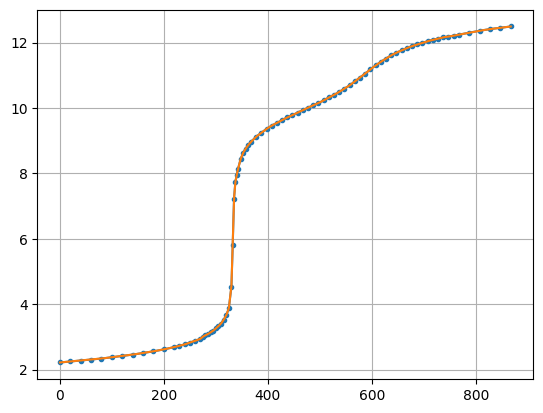

In [42]:
fig, axe = plt.subplots()
axe.plot(V, pH, ".-")
axe.plot(Vlin, pHlin)
axe.grid()

(0.0, 0.1)

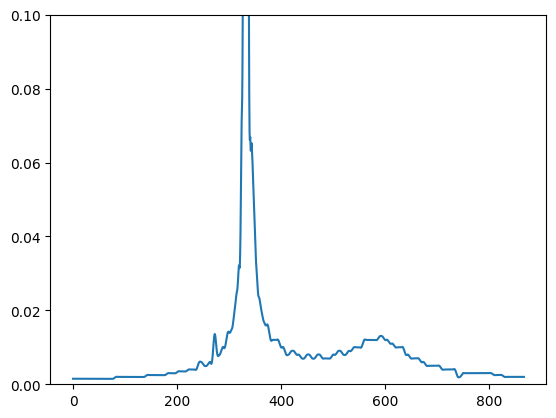

In [43]:
fig, axe = plt.subplots()
axe.plot(Vlin, d1pHs)
axe.set_ylim([0, 0.1])

(-0.01, 0.01)

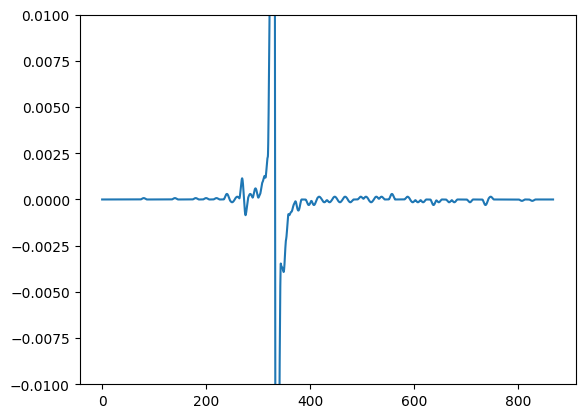

In [46]:
fig, axe = plt.subplots()
axe.plot(Vlin, d2pHs)
axe.set_ylim([-0.01, 0.01])